In [16]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import inverse_method_funs_med as inv

In [17]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data
Load cross sectional backscatter matrix that contains the mean values for each species

In [18]:
# Sigmabs from ZooScatR model runs + viscous elactic model for mean of fish larvae model by ve=True)
fname_sim = '../ZooScatStuff/my_simplified_data.feather'
specs, freqs_sim, sig_bs_mean, ci_boot = inv.read_scatteringmodelsimulations(fname_sim, nsim=1000, ve=True, percentiles=(25,75))

In [19]:
np.shape(ci_boot)

(2, 801, 5)

# Select frequency range
The vectors have to be independant over the range of the emitted frequenciesm

In [20]:
BBrange_200 = [185, 255]
BBrange_333 = [283, 383]

BBfreqs_200 = np.where((freqs_sim>BBrange_200[0]) & (freqs_sim<BBrange_200[1]))
BBfreqs_333 = np.where((freqs_sim>BBrange_333[0]) & (freqs_sim<BBrange_333[1]))

In [21]:
np.shape(sig_bs_mean)

(801, 5)

In [22]:
sigbs_200 = sig_bs_mean[BBfreqs_200,:][0]
sigbs_333 = sig_bs_mean[BBfreqs_333,:][0]

freqs_200 = freqs_sim[BBfreqs_200]
freqs_333 = freqs_sim[BBfreqs_333]

In [23]:
np.shape(freqs_sim)

(801,)

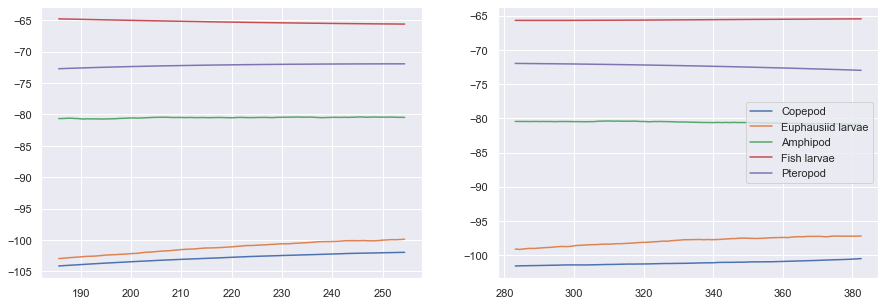

In [24]:
fig=plt.figure(figsize=(15,5))
ax = fig.subplots(1,2)
ax[0].plot(freqs_200, 10*np.log10(sigbs_200))
ax[1].plot(freqs_333, 10*np.log10(sigbs_333));
plt.legend(specs)

# Rank

The rank tells us if the columns of the vector are linearly independant. Linear independance is important for knowing if each species introduces a new dimensions for the solution. If two species (vectors) are dependant they would be indisquindishable in the least-squares solutions

In [32]:
np.linalg.matrix_rank(sigbs_333)

5

Works with default tol. too good to be true? 

What should the tol be? Default? Look into what is my CI ish 

    "The most useful measure of the tolerance depends on the operations you intend to use on your matrix. For example, if your data come from uncertain measurements with uncertainties greater than floating point epsilon, choosing a tolerance near that uncertainty may be preferable. The tolerance may be absolute if the uncertainties are absolute rather than relative." -  from np.linalg.matrix_rank documentations"
    
Only 2 dimensions if looking for mean ci tolerance. Default should be ok though..

In [11]:
specs

array(['Copepod', 'Euphausiid larvae', 'Amphipod', 'Fish larvae',
       'Pteropod'], dtype=object)

In [19]:
 np.mean(ci_boot[:,BBfreqs_333,:])

1.5676616380559355e-07